In [116]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<h1 align="center"> SVM Tuning </h1>
<h3 align="center"> Christine Zhang </h3>

---

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import pickle
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

### SVM Tuning

---

In [2]:
file_name = "datasets/cn_mut_exp_bin_pd"
file_object = open(file_name,'r')  
cn_mut_exp_bin_pd = pickle.load(file_object)
cn_mut_exp_bin = cn_mut_exp_bin_pd.as_matrix()
entrez_id_lst = cn_mut_exp_bin_pd.index
cn_mut_exp_bin_pd.head()

,1_x,503538_x,29974_x,2_x,144571_x,144568_x,3,53947_x,51146_x,100506677,...,Sites_pancreas,Sites_pleura,Sites_prostate,Sites_salivary_gland,Sites_skin,Sites_soft_tissue,Sites_stomach,Sites_thyroid,Sites_upper_aerodigestive_tract,Sites_urinary_tract
3,-0.0324,-0.0324,-0.4928,-0.0657,-0.0657,-0.0657,-0.0657,-0.0390,0.0518,0.4291,...,0,0,0,0,0,0,0,0,0,1
7,-0.0762,-0.0762,-0.0025,0.4486,0.4486,0.4486,0.4486,-0.0574,-0.0303,-0.0712,...,0,0,1,0,0,0,0,0,0,0
10,0.0346,0.0346,-0.0522,-0.3816,-0.3816,-0.3816,-0.3816,-0.0155,-0.2675,-0.7758,...,0,0,0,0,0,0,0,0,0,0
15,0.2934,0.2934,-0.3050,0.1603,0.1603,0.1603,0.1603,-0.2881,0.2831,0.0613,...,0,0,0,0,0,0,0,0,0,1
16,0.0463,0.0463,0.0436,-0.0112,-0.0112,-0.0112,-0.0112,0.0834,0.0468,0.0528,...,0,0,0,0,0,0,0,0,0,0


In [3]:
file_name = "datasets/gene_exp_bin_pd"
file_object = open(file_name,'r')  
gene_exp_bin_pd = pickle.load(file_object)
gene_exp_bin = gene_exp_bin_pd.as_matrix()
gene_exp_bin_pd.head()

,100009676,10000,10001,10002,10003,100048912,10004,10005,10006,10007,...,Sites_pancreas,Sites_pleura,Sites_prostate,Sites_salivary_gland,Sites_skin,Sites_soft_tissue,Sites_stomach,Sites_thyroid,Sites_upper_aerodigestive_tract,Sites_urinary_tract
3,5.979812,6.595651,9.663415,4.040661,4.159523,4.099417,4.518963,8.236260,8.543386,10.146590,...,0,0,0,0,0,0,0,0,0,1
7,6.079415,4.521625,8.845639,3.768181,4.044822,4.151676,4.201540,7.922227,9.147535,8.564433,...,0,0,1,0,0,0,0,0,0,0
10,5.373842,6.631749,10.001350,3.610522,4.242035,3.859894,4.561051,8.697279,8.833257,8.895942,...,0,0,0,0,0,0,0,0,0,0
15,6.025009,7.510764,9.289334,3.685390,3.656942,4.138587,4.599801,8.492029,9.341341,9.578695,...,0,0,0,0,0,0,0,0,0,1
16,5.444892,7.544216,8.715909,4.173643,3.663081,4.069507,4.523500,7.735855,9.247934,10.152180,...,0,0,0,0,0,0,0,0,0,0


In [4]:
auc_pd = pd.read_csv('dataset1.csv', skiprows = [0,1], sep =",", 
                          names = ["Cclid", "Cellline", "Sites", "Histology", "Subhistology", "Culture", "SNP", "AUC"])
auc_lst = []
for index, cclid in enumerate(auc_pd["Cclid"]):
    if str(cclid) in entrez_id_lst:
        auc_lst.append(auc_pd["AUC"][index])
auc_lst = np.array(auc_lst)
auc_lst = auc_lst.reshape([471,1])
print np.shape(auc_lst)

(471, 1)


In [5]:
svr_rbf = SVR(kernel = "rbf")

def test_model (model):
    clf = model
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    r2 = clf.score(x_test, y_test)
    return y_pred, r2

### C

---

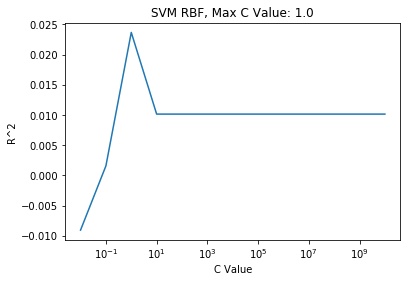

In [6]:
all_onehot_scaled = preprocessing.scale(cn_mut_exp_bin)
master_auc_scaled = preprocessing.scale(auc_lst)

x_train, x_test, y_train, y_test = train_test_split(all_onehot_scaled, master_auc_scaled, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# default C = 1.0, default epsilon = 0.1
C_range = np.logspace(-2, 10, 13)
r_2_lst = []
for index, c_val in enumerate(C_range):
    svr_rbf = SVR(kernel = "rbf", C = c_val)
    svr_rbf_y_pred, r2_svr_rbf = test_model (svr_rbf)
    r_2_lst.append(r2_svr_rbf)
plt.semilogx(C_range, r_2_lst)
plt.title("SVM RBF, Max C Value: %s" % (C_range[np.argmax(r_2_lst)]))
plt.xlabel("C Value")
plt.ylabel("R^2")
plt.show()

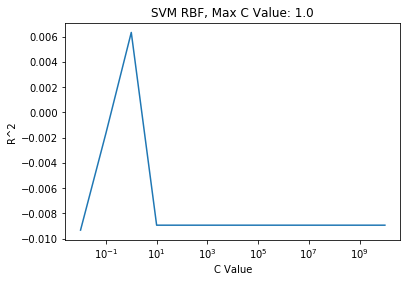

In [7]:
all_onehot_scaled = preprocessing.scale(gene_exp_bin)
master_auc_scaled = preprocessing.scale(auc_lst)

x_train, x_test, y_train, y_test = train_test_split(all_onehot_scaled, master_auc_scaled, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# default C = 1.0, default epsilon = 0.1
C_range = np.logspace(-2, 10, 13)
r_2_lst = []
for index, c_val in enumerate(C_range):
    svr_rbf = SVR(kernel = "rbf", C = c_val)
    svr_rbf_y_pred, r2_svr_rbf = test_model (svr_rbf)
    r_2_lst.append(r2_svr_rbf)
plt.semilogx(C_range, r_2_lst)
plt.title("SVM RBF, Max C Value: %s" % (C_range[np.argmax(r_2_lst)]))
plt.xlabel("C Value")
plt.ylabel("R^2")
plt.show()

### Gamma

---

In [17]:
print "Optimal All Data Gamma: ", float(1)/43269
print "Optimal Gene Expression Gamma: ", float(1)/18565  

Optimal All Data Gamma:  2.3111234371e-05
Optimal Gene Expression Gamma:  5.38647993536e-05


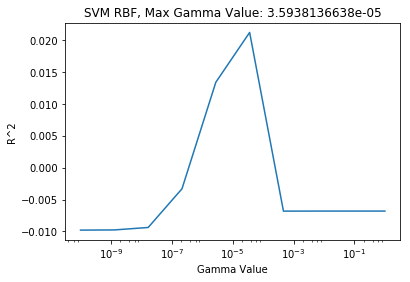

In [12]:
all_onehot_scaled = preprocessing.scale(cn_mut_exp_bin)
master_auc_scaled = preprocessing.scale(auc_lst)

x_train, x_test, y_train, y_test = train_test_split(all_onehot_scaled, master_auc_scaled, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# default C = 1.0, default epsilon = 0.1, default gamma = 2.31e-05
Gamma_range = np.logspace(-10, 0, 10)
r_2_lst = []
for index, gamma_val in enumerate(Gamma_range):
    svr_rbf = SVR(kernel = "rbf", gamma = gamma_val)
    svr_rbf_y_pred, r2_svr_rbf = test_model (svr_rbf)
    r_2_lst.append(r2_svr_rbf)
plt.semilogx(Gamma_range, r_2_lst)
plt.title("SVM RBF, Max Gamma Value: %s" % (Gamma_range[np.argmax(r_2_lst)]))
plt.xlabel("Gamma Value")
plt.ylabel("R^2")
plt.show()

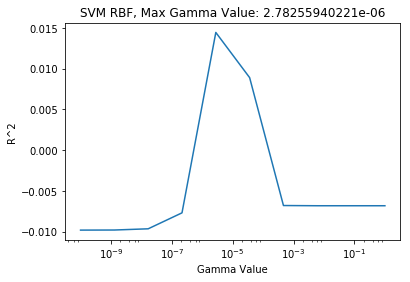

In [18]:
all_onehot_scaled = preprocessing.scale(gene_exp_bin)
master_auc_scaled = preprocessing.scale(auc_lst)

x_train, x_test, y_train, y_test = train_test_split(all_onehot_scaled, master_auc_scaled, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# default C = 1.0, default epsilon = 0.1, default gamma = 5.39 e-05
Gamma_range = np.logspace(-10, 0, 10)
r_2_lst = []
for index, gamma_val in enumerate(Gamma_range):
    svr_rbf = SVR(kernel = "rbf", gamma = gamma_val)
    svr_rbf_y_pred, r2_svr_rbf = test_model (svr_rbf)
    r_2_lst.append(r2_svr_rbf)
plt.semilogx(Gamma_range, r_2_lst)
plt.title("SVM RBF, Max Gamma Value: %s" % (Gamma_range[np.argmax(r_2_lst)]))
plt.xlabel("Gamma Value")
plt.ylabel("R^2")
plt.show()